# Assignment Week 8
Data Augmentation and AE Networks usinng MNIST

In [47]:
#MNIST is a build in Pytorch dataset
from torchvision import datasets as dts
from torchvision.transforms import ToTensor
train = dts.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
test = dts.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

In [48]:
train[0][0].shape

torch.Size([1, 28, 28])

In [49]:
train[0][-1]

5

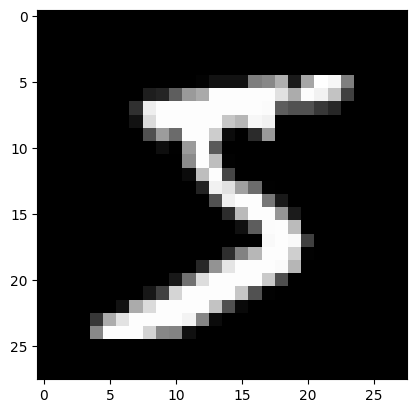

In [50]:
import matplotlib.pyplot as plt
plt.imshow(train[0][0].reshape((28,28)), cmap='gray')

## Exercise 1
Augment the training data with 6 differnet suitable augmentations
* use the PyTorch augmentation framework -> https://pytorch.org/vision/stable/transforms.html
* visualize some examples

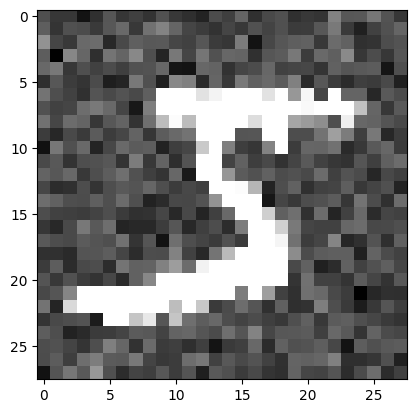

In [51]:
# Image Classification
import torch
from torchvision.transforms import v2


transforms = v2.Compose([
    #v2.RandomResizedCrop(size=(28, 28), antialias=True),
    #v2.RandomHorizontalFlip(p=0.1),
    v2.RandomRotation(60),
    v2.GaussianNoise(0.3,0.1),

    v2.ToDtype(torch.float32, scale=True),
    #v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

plt.imshow(transforms(train[0][0]).reshape((28,28)), cmap='gray')

## Exercise 2
Build and train a MLP Autoencoder with
* 2 Encoder Layers
* 2 Decoder Layers
* Identity Loss

In [52]:

#from torch.nn.functional import relu

class AE(torch.nn.Module):

    def __init__(self):
        super().__init__()

        self.encoden_hidden_layer = torch.nn.Linear(28*28,28*14)
        self.encoden_output_layer = torch.nn.Linear(28*14,28*7)

        self.decoder_hidden_layer = torch.nn.Linear(28*7,28*14)
        self.decoder_output_layer = torch.nn.Linear(28*14,28*28)

    def forward(self, x):
        x = x.reshape(x.size(0), -1)
        activation = self.encoden_hidden_layer(x)
        activation = torch.relu(activation)
        code = self.encoden_output_layer(activation)
        code = torch.relu(code)
        activation = self.decoder_hidden_layer(code)
        activation = torch.relu(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.relu(activation)
        return reconstructed

In [53]:
device = torch.device('cuda')
for images, labels in train:
  images.to(device)
  #print(labels)
for images, labels in test:
  images.to(device)

In [54]:
mlp = AE()
mlp.to(device) # transfer model to GPU
mlp.train()    # set to train mode
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mlp.parameters(), lr = 0.003, momentum=0.9)

criterion = nn.MSELoss()  # Identity Loss
optimizer = optim.Adam(mlp.parameters(), lr=1e-3)

In [55]:
num_epochs = 10
for epoch in range(num_epochs):
    total_loss = 0
    for batch in test:
        inputs, _ = batch
        inputs = inputs.to(device)

        # Forward
        outputs = mlp(inputs)
        loss = criterion(outputs, inputs.view(inputs.size(0), -1))

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(test):.4f}")

Epoch [1/10], Loss: 0.0433
Epoch [2/10], Loss: 0.0348
Epoch [3/10], Loss: 0.0329
Epoch [4/10], Loss: 0.0316
Epoch [5/10], Loss: 0.0310
Epoch [6/10], Loss: 0.0305
Epoch [7/10], Loss: 0.0302
Epoch [8/10], Loss: 0.0300
Epoch [9/10], Loss: 0.0299
Epoch [10/10], Loss: 0.0298


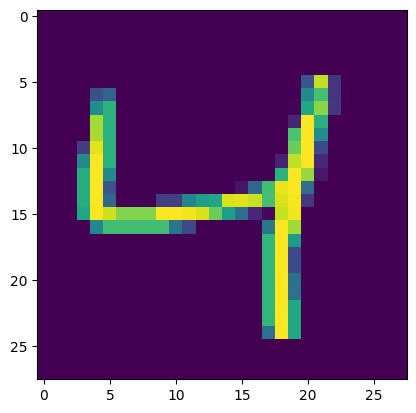

In [67]:
plt.imshow(train[2][0].resize(28,28))

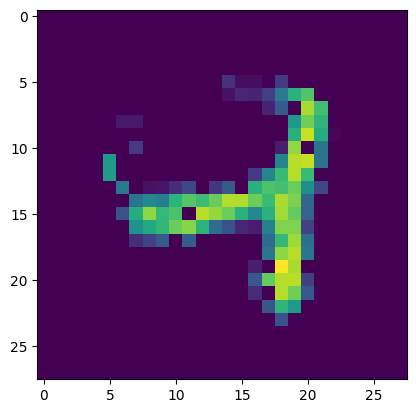

In [66]:
plt.imshow(mlp(train[2][0].to(device)).resize(28,28).cpu().detach().numpy())

## Exercise 3


Use the Gaussian Noise as augmentation and your AE to remove the noise.
* visualize input and output examples

In [56]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean

    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

## Exercise 4
Clustering: extract the latent space representations of the train data and apply K-Means (fron Scikit-Learn) with k=10. Use the data lables to evaluate the cluter quality.